### 2021_09_27_2

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
os.listdir()

['02_Titanic_pandas.ipynb',
 '20210921_00_datamerge.csv',
 '01_pandas_basic.ipynb',
 '03_pandas_corona.ipynb',
 '.ipynb_checkpoints',
 'seaborn_복습.ipynb']

In [3]:
corona = pd.read_csv("./CSV/20210921_00_datamerge.csv")
corona.shape

(178, 21)

In [5]:
# 보여주는 최대 행
pd.options.display.max_rows

60

In [6]:
# 보여주는 최대 열
pd.options.display.max_columns

20

In [9]:
# ...으로 가려져 안보이는 부분 전체 보이도록 수정
pd.options.display.max_rows = 500
pd.options.display.max_columns = 500

In [8]:
corona.head(10)

,국가명,eng_code,발생률,인구수,확진자_합계,백신접종,접종률(인구),발생률_순위,접종률_순위,확진자비율_전체인구,1차접종,2차접종,위중증,치명(%),완치(%),확진자1일,사망자합계,사망자1일,완치합계,완치1일,접종비율(일간)
0,미국,U.S.,129632,331002651,42908619,385586020.0,60.2,13.0,46.0,0.129632,63.8,54.6,24327\n-523,1.6,75.8,41814.0,691992,430.0,32508846.0,25620.0,763444.0
1,인도,India,24277,1380004385,33483170,808389300.0,29.6,101.0,99.0,0.024263,43.7,14.5,8944,1.3,97.7,32085.0,445248,349.0,32715105.0,43938.0,9236028.0
2,브라질,Brazil,99924,212559417,21239783,222322660.0,53.9,27.0,62.0,0.099924,69.4,37.8,8318,2.8,95.5,9458.0,590786,239.0,20280294.0,NaN,1721039.0
3,영국,U.K.,109444,67886011,7429746,93002090.0,69.6,21.0,25.0,0.109444,72.7,66.5,1020,1.8,80.5,29007.0,135203,56.0,5981684.0,22993.0,83947.0
4,러시아,Russia,49986,145934462,7294672,87810616.0,29.9,77.0,97.0,0.049986,31.9,27.6,2300,2.7,89.3,19744.0,198996,778.0,6510674.0,11992.0,354749.0
5,프랑스,France,106557,65273511,6955333,92262410.0,71.2,23.0,22.0,0.106557,76.7,72.7,1832\n-168,1.7,95.6,5814.0,116030,28.0,6649678.0,23192.0,242012.0
6,터키,Turkey,81187,84339067,6847259,105114640.0,63.2,45.0,41.0,0.081187,63.3,50.5,633,0.9,92.5,26398.0,61574,213.0,6337070.0,27160.0,472820.0
7,이란,Iran,64794,83992949,5442232,42003864.0,25.2,62.0,107.0,0.064794,34.1,16.6,6707\n-58,2.2,88.1,17397.0,117526,344.0,4792117.0,27119.0,1114116.0
8,아르헨티나,Argentina,115923,45195774,5239232,49017570.0,54.5,16.0,61.0,0.115923,64.5,44.3,1496\n-20,2.2,97.3,622.0,114428,61.0,5096283.0,2932.0,290888.0
9,콜롬비아,Colombia,97107,50882891,4941064,38331644.0,38.0,30.0,80.0,0.097107,49.3,31.7,542,2.5,96.7,1813.0,125895,35.0,4779552.0,1756.0,163255.0


In [10]:
corona.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   국가명         178 non-null    object 
 1   eng_code    178 non-null    object 
 2   발생률         178 non-null    int64  
 3   인구수         178 non-null    int64  
 4   확진자_합계      178 non-null    int64  
 5   백신접종        178 non-null    float64
 6   접종률(인구)     178 non-null    float64
 7   발생률_순위      178 non-null    float64
 8   접종률_순위      178 non-null    float64
 9   확진자비율_전체인구  178 non-null    float64
 10  1차접종        178 non-null    float64
 11  2차접종        178 non-null    float64
 12  위중증         131 non-null    object 
 13  치명(%)       178 non-null    object 
 14  완치(%)       175 non-null    float64
 15  확진자1일       130 non-null    float64
 16  사망자합계       178 non-null    int64  
 17  사망자1일       104 non-null    float64
 18  완치합계        175 non-null    float64
 19  완치1일        115 non-null    f

### 가설 : 백신 접종은 코로나 감염에 효과가 있다.

### 접종률(인구)와 발생률의 관계

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import matplotlib
import platform

In [12]:
path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")
    
matplotlib.rcParams['axes.unicode_minus'] = False

In [13]:
corona.head()

,국가명,eng_code,발생률,인구수,확진자_합계,백신접종,접종률(인구),발생률_순위,접종률_순위,확진자비율_전체인구,1차접종,2차접종,위중증,치명(%),완치(%),확진자1일,사망자합계,사망자1일,완치합계,완치1일,접종비율(일간)
0,미국,U.S.,129632,331002651,42908619,385586020.0,60.2,13.0,46.0,0.129632,63.8,54.6,24327\n-523,1.6,75.8,41814.0,691992,430.0,32508846.0,25620.0,763444.0
1,인도,India,24277,1380004385,33483170,808389300.0,29.6,101.0,99.0,0.024263,43.7,14.5,8944,1.3,97.7,32085.0,445248,349.0,32715105.0,43938.0,9236028.0
2,브라질,Brazil,99924,212559417,21239783,222322660.0,53.9,27.0,62.0,0.099924,69.4,37.8,8318,2.8,95.5,9458.0,590786,239.0,20280294.0,NaN,1721039.0
3,영국,U.K.,109444,67886011,7429746,93002090.0,69.6,21.0,25.0,0.109444,72.7,66.5,1020,1.8,80.5,29007.0,135203,56.0,5981684.0,22993.0,83947.0
4,러시아,Russia,49986,145934462,7294672,87810616.0,29.9,77.0,97.0,0.049986,31.9,27.6,2300,2.7,89.3,19744.0,198996,778.0,6510674.0,11992.0,354749.0


In [14]:
corona.columns

Index(['국가명', 'eng_code', '발생률', '인구수', '확진자_합계', '백신접종', '접종률(인구)', '발생률_순위',
       '접종률_순위', '확진자비율_전체인구', '1차접종', '2차접종', '위중증', '치명(%)', '완치(%)',
       '확진자1일', '사망자합계', '사망자1일', '완치합계', '완치1일', '접종비율(일간)'],
      dtype='object')

### 컬럼명 변경

In [15]:
corona.columns = ['국가명', 'eng_code', '발생률', '인구수', '확진자_합계', '백신접종', '백신보유율(인구)', '발생률_순위',
       '접종률_순위', '확진자비율_전체인구', '1차접종', '2차접종', '위중증', '치명(%)', '완치(%)',
       '확진자1일', '사망자합계', '사망자1일', '완치합계', '완치1일', '접종비율(일간)']

In [18]:
corona = corona.drop(['확진자비율_전체인구'], axis = 1) # axis = 1 : columns 기준
corona.columns

Index(['국가명', 'eng_code', '발생률', '인구수', '확진자_합계', '백신접종', '백신보유율(인구)',
       '발생률_순위', '접종률_순위', '1차접종', '2차접종', '위중증', '치명(%)', '완치(%)', '확진자1일',
       '사망자합계', '사망자1일', '완치합계', '완치1일', '접종비율(일간)'],
      dtype='object')

In [19]:
corona

,국가명,eng_code,발생률,인구수,확진자_합계,백신접종,백신보유율(인구),발생률_순위,접종률_순위,1차접종,2차접종,위중증,치명(%),완치(%),확진자1일,사망자합계,사망자1일,완치합계,완치1일,접종비율(일간)
0,미국,U.S.,129632,331002651,42908619,3.855860e+08,60.2,13.0,46.0,63.8,54.60,24327\n-523,1.6,75.8,41814.0,691992,430.0,32508846.0,25620.0,763444.0
1,인도,India,24277,1380004385,33483170,8.083893e+08,29.6,101.0,99.0,43.7,14.50,8944,1.3,97.7,32085.0,445248,349.0,32715105.0,43938.0,9236028.0
2,브라질,Brazil,99924,212559417,21239783,2.223227e+08,53.9,27.0,62.0,69.4,37.80,8318,2.8,95.5,9458.0,590786,239.0,20280294.0,NaN,1721039.0
3,영국,U.K.,109444,67886011,7429746,9.300209e+07,69.6,21.0,25.0,72.7,66.50,1020,1.8,80.5,29007.0,135203,56.0,5981684.0,22993.0,83947.0
4,러시아,Russia,49986,145934462,7294672,8.781062e+07,29.9,77.0,97.0,31.9,27.60,2300,2.7,89.3,19744.0,198996,778.0,6510674.0,11992.0,354749.0
5,프랑스,France,106557,65273511,6955333,9.226241e+07,71.2,23.0,22.0,76.7,72.70,1832\n-168,1.7,95.6,5814.0,116030,28.0,6649678.0,23192.0,242012.0
6,터키,Turkey,81187,84339067,6847259,1.051146e+08,63.2,45.0,41.0,63.3,50.50,633,0.9,92.5,26398.0,61574,213.0,6337070.0,27160.0,472820.0
7,이란,Iran,64794,83992949,5442232,4.200386e+07,25.2,62.0,107.0,34.1,16.60,6707\n-58,2.2,88.1,17397.0,117526,344.0,4792117.0,27119.0,1114116.0
8,아르헨티나,Argentina,115923,45195774,5239232,4.901757e+07,54.5,16.0,61.0,64.5,44.30,1496\n-20,2.2,97.3,622.0,114428,61.0,5096283.0,2932.0,290888.0
9,콜롬비아,Colombia,97107,50882891,4941064,3.833164e+07,38.0,30.0,80.0,49.3,31.70,542,2.5,96.7,1813.0,125895,35.0,4779552.0,1756.0,163255.0


### 인구당확진자비율 추가

In [20]:
corona["인구당확진자비율"] = corona["확진자_합계"] / corona["인구수"]
corona.head()

,국가명,eng_code,발생률,인구수,확진자_합계,백신접종,백신보유율(인구),발생률_순위,접종률_순위,1차접종,2차접종,위중증,치명(%),완치(%),확진자1일,사망자합계,사망자1일,완치합계,완치1일,접종비율(일간),인구당확진자비율
0,미국,U.S.,129632,331002651,42908619,385586020.0,60.2,13.0,46.0,63.8,54.6,24327\n-523,1.6,75.8,41814.0,691992,430.0,32508846.0,25620.0,763444.0,0.129632
1,인도,India,24277,1380004385,33483170,808389300.0,29.6,101.0,99.0,43.7,14.5,8944,1.3,97.7,32085.0,445248,349.0,32715105.0,43938.0,9236028.0,0.024263
2,브라질,Brazil,99924,212559417,21239783,222322660.0,53.9,27.0,62.0,69.4,37.8,8318,2.8,95.5,9458.0,590786,239.0,20280294.0,NaN,1721039.0,0.099924
3,영국,U.K.,109444,67886011,7429746,93002090.0,69.6,21.0,25.0,72.7,66.5,1020,1.8,80.5,29007.0,135203,56.0,5981684.0,22993.0,83947.0,0.109444
4,러시아,Russia,49986,145934462,7294672,87810616.0,29.9,77.0,97.0,31.9,27.6,2300,2.7,89.3,19744.0,198996,778.0,6510674.0,11992.0,354749.0,0.049986


### 인구당확진자비율과 백신 접종률에 대한 상관관계

In [21]:
# 비어있는 데이터 확인
corona.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   국가명        178 non-null    object 
 1   eng_code   178 non-null    object 
 2   발생률        178 non-null    int64  
 3   인구수        178 non-null    int64  
 4   확진자_합계     178 non-null    int64  
 5   백신접종       178 non-null    float64
 6   백신보유율(인구)  178 non-null    float64
 7   발생률_순위     178 non-null    float64
 8   접종률_순위     178 non-null    float64
 9   1차접종       178 non-null    float64
 10  2차접종       178 non-null    float64
 11  위중증        131 non-null    object 
 12  치명(%)      178 non-null    object 
 13  완치(%)      175 non-null    float64
 14  확진자1일      130 non-null    float64
 15  사망자합계      178 non-null    int64  
 16  사망자1일      104 non-null    float64
 17  완치합계       175 non-null    float64
 18  완치1일       115 non-null    float64
 19  접종비율(일간)   178 non-null    float64
 20  인구당확진자비율  

<AxesSubplot:xlabel='발생률', ylabel='2차접종'>

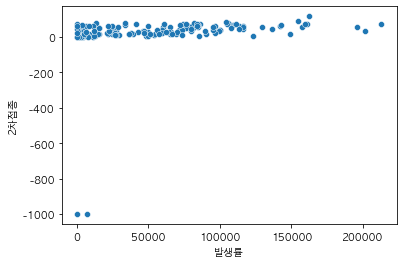

In [22]:
sns.scatterplot(x = "발생률", y = "2차접종", data = corona)

In [23]:
# 이상치 확인
corona.loc[corona["2차접종"] < 0, :]

,국가명,eng_code,발생률,인구수,확진자_합계,백신접종,백신보유율(인구),발생률_순위,접종률_순위,1차접종,2차접종,위중증,치명(%),완치(%),확진자1일,사망자합계,사망자1일,완치합계,완치1일,접종비율(일간),인구당확진자비율
143,레소토,Lesotho,6720,2142249,14395,201795.0,4.9,126.0,147.0,2.0,-999.0,NaN,2.8,47.4,NaN,403,NaN,6830.0,NaN,24504.0,0.006720
177,미크로네시아,Micronesia,9,115023,1,69970.0,33.6,178.0,89.0,40.8,-999.0,NaN,-,100.0,NaN,0,NaN,1.0,NaN,242.0,0.000009


### 이상치 제거(레소토, 미크로네시아 제거)

In [25]:
corona = corona.loc[corona["2차접종"] > 0, :]
corona.loc[corona["2차접종"] < 0, :]

,국가명,eng_code,발생률,인구수,확진자_합계,백신접종,백신보유율(인구),발생률_순위,접종률_순위,1차접종,2차접종,위중증,치명(%),완치(%),확진자1일,사망자합계,사망자1일,완치합계,완치1일,접종비율(일간),인구당확진자비율


In [26]:
corona.shape

(176, 21)

<AxesSubplot:xlabel='발생률', ylabel='2차접종'>

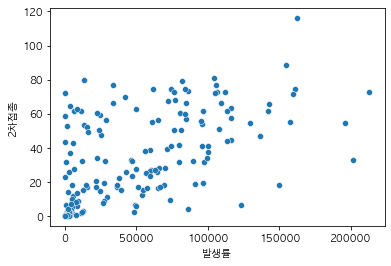

In [27]:
sns.scatterplot(x = "발생률", y = "2차접종", data = corona)

In [28]:
corona[["발생률", "2차접종"]].corr()

,발생률,2차접종
발생률,1.000000,0.578879
2차접종,0.578879,1.000000


### 인구당확진자비율과 백신 접종률에 대한 상관관계

<AxesSubplot:xlabel='인구당확진자비율', ylabel='2차접종'>

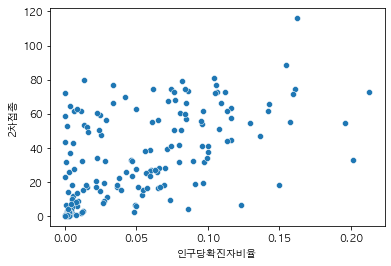

In [29]:
sns.scatterplot(x = "인구당확진자비율", y = "2차접종", data = corona)

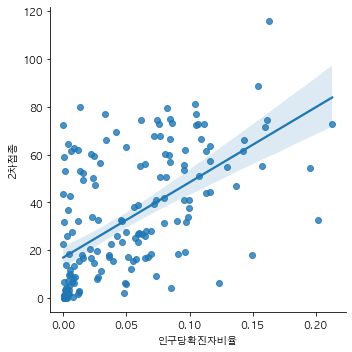

In [30]:
sns.lmplot(x = "인구당확진자비율", y = "2차접종", data = corona)

In [31]:
corona[["발생률", "2차접종"]].corr()

,발생률,2차접종
발생률,1.000000,0.578879
2차접종,0.578879,1.000000


### 확인 결과 나라별 백신 접종률과 인구당 확진자 비율은 0.578의 양의 상관관계를 갖는다.
    * 백신을 접종하면 할수록 인구당 확진자 비율은 양의 관계로 늘어난다.

### 백신 발생률과 사망률(인구당)은 어떠한가?

In [32]:
corona["사망률"] = corona["사망자합계"] / corona["인구수"]
corona.head()

,국가명,eng_code,발생률,인구수,확진자_합계,백신접종,백신보유율(인구),발생률_순위,접종률_순위,1차접종,2차접종,위중증,치명(%),완치(%),확진자1일,사망자합계,사망자1일,완치합계,완치1일,접종비율(일간),인구당확진자비율,사망률
0,미국,U.S.,129632,331002651,42908619,385586020.0,60.2,13.0,46.0,63.8,54.6,24327\n-523,1.6,75.8,41814.0,691992,430.0,32508846.0,25620.0,763444.0,0.129632,0.002091
1,인도,India,24277,1380004385,33483170,808389300.0,29.6,101.0,99.0,43.7,14.5,8944,1.3,97.7,32085.0,445248,349.0,32715105.0,43938.0,9236028.0,0.024263,0.000323
2,브라질,Brazil,99924,212559417,21239783,222322660.0,53.9,27.0,62.0,69.4,37.8,8318,2.8,95.5,9458.0,590786,239.0,20280294.0,NaN,1721039.0,0.099924,0.002779
3,영국,U.K.,109444,67886011,7429746,93002090.0,69.6,21.0,25.0,72.7,66.5,1020,1.8,80.5,29007.0,135203,56.0,5981684.0,22993.0,83947.0,0.109444,0.001992
4,러시아,Russia,49986,145934462,7294672,87810616.0,29.9,77.0,97.0,31.9,27.6,2300,2.7,89.3,19744.0,198996,778.0,6510674.0,11992.0,354749.0,0.049986,0.001364


### 가설 : 백신은 중증과 사망자 감소에 효과가 있다.

### 2 - 1 백신 접종률과 사망률의 관계는 어떠한가?

In [33]:
corona[["사망률", "2차접종"]].corr()

,사망률,2차접종
사망률,1.000000,0.343234
2차접종,0.343234,1.000000


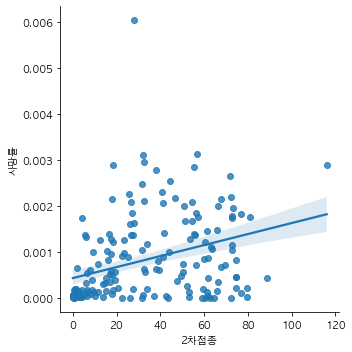

In [35]:
sns.lmplot(x = "2차접종", y = "사망률", data = corona)

### 백신 접종률과 사망률은 0.343의 양의 상관관계를 갖는다.
    * 데이터로 봤을 때, 이 부분에 대한 확인이 필요해 보인다.

### 2 - 2 백신 접종률과 중증 감소의 관계는 어떠한가?

In [37]:
corona.head(3)

,국가명,eng_code,발생률,인구수,확진자_합계,백신접종,백신보유율(인구),발생률_순위,접종률_순위,1차접종,2차접종,위중증,치명(%),완치(%),확진자1일,사망자합계,사망자1일,완치합계,완치1일,접종비율(일간),인구당확진자비율,사망률
0,미국,U.S.,129632,331002651,42908619,385586020.0,60.2,13.0,46.0,63.8,54.6,24327\n-523,1.6,75.8,41814.0,691992,430.0,32508846.0,25620.0,763444.0,0.129632,0.002091
1,인도,India,24277,1380004385,33483170,808389300.0,29.6,101.0,99.0,43.7,14.5,8944,1.3,97.7,32085.0,445248,349.0,32715105.0,43938.0,9236028.0,0.024263,0.000323
2,브라질,Brazil,99924,212559417,21239783,222322660.0,53.9,27.0,62.0,69.4,37.8,8318,2.8,95.5,9458.0,590786,239.0,20280294.0,NaN,1721039.0,0.099924,0.002779


In [38]:
corona["위중증"].unique()

array(['24327\n-523', '8944', '8318', '1020', '2300', '1832\n-168', '633',
       '6707\n-58', '1496\n-20', '542', '1028', '530\n+11', nan, '1217',
       '4798', '113\n+2', '3170', '177', '1043\n+9', '1191\n+26',
       '208\n+11', '618\n+2', '28\n-1', '1458\n-42', '434\n-4', '638',
       '1403', '4387', '714\n-12', '4840\n-124', '218', '952\n+103', '43',
       '86\n-4', '776\n+3', '181\n-2', '221', '260\n+3', '45\n+4',
       '509\n+2', '503\n+42', '219\n+7', '380\n-5', '348', '200',
       '339\n-4', '5', '759', '489', '220', '391\n-5', '108', '37\n+1',
       '16\n-1', '60\n+1', '85\n+4', '11', '63\n-3', '515', '681',
       '22\n-1', '784\n-16', '166\n+4', '19\n-8', '90', '332\n-1',
       '63\n+3', '100\n+6', '192', '2', '109', '19\n+1', '21\n-3',
       '20\n+1', '131', '1', '23', '3', '1124', '36\n-2', '18', '32',
       '20', '12', '19', '42', '381', '45', '127\n-31', '19\n-4', '292',
       '152', '55\n-2', '21\n+3', '9', '7\n-1', '67', '8', '39', '10',
       '22', '24', '

## Pandas 문자열 처리
    * [ ].str.strip() : 앞뒤 공백 제거
    * [ ].str.lstrip() : 앞 공백 제거
    * [ ].str.rstrip() : 뒤 공백 제거
    * [ ].str.split("구분자", n = 1, expand = True) : 구분자를 기준으로 n개로 나눈다. expand = True(여러컬럼), False(하나의 컬럼)

In [41]:
corona["위중증"].str.split("\n", expand = True)

,0,1
0,24327,-523
1,8944,None
2,8318,None
3,1020,None
4,2300,None
5,1832,-168
6,633,None
7,6707,-58
8,1496,-20
9,542,None


In [43]:
corona[["위중증_수", "위중증_증감"]] = corona["위중증"].str.split("\n", expand = True)
corona.head(3)

,국가명,eng_code,발생률,인구수,확진자_합계,백신접종,백신보유율(인구),발생률_순위,접종률_순위,1차접종,2차접종,위중증,치명(%),완치(%),확진자1일,사망자합계,사망자1일,완치합계,완치1일,접종비율(일간),인구당확진자비율,사망률,위중증_수,위중증_증감
0,미국,U.S.,129632,331002651,42908619,385586020.0,60.2,13.0,46.0,63.8,54.6,24327\n-523,1.6,75.8,41814.0,691992,430.0,32508846.0,25620.0,763444.0,0.129632,0.002091,24327,-523
1,인도,India,24277,1380004385,33483170,808389300.0,29.6,101.0,99.0,43.7,14.5,8944,1.3,97.7,32085.0,445248,349.0,32715105.0,43938.0,9236028.0,0.024263,0.000323,8944,None
2,브라질,Brazil,99924,212559417,21239783,222322660.0,53.9,27.0,62.0,69.4,37.8,8318,2.8,95.5,9458.0,590786,239.0,20280294.0,NaN,1721039.0,0.099924,0.002779,8318,None


In [45]:
# 위중증률 = 위중증 / 인구수
corona["위중증률"] = corona["위중증_수"] / corona["인구수"]
corona.head(3)

TypeError: unsupported operand type(s) for /: 'str' and 'int'

### 에러 발생
    * unsupported operand type(s) for /: 'str' and 'int'

In [46]:
corona.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 176 entries, 0 to 176
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   국가명        176 non-null    object 
 1   eng_code   176 non-null    object 
 2   발생률        176 non-null    int64  
 3   인구수        176 non-null    int64  
 4   확진자_합계     176 non-null    int64  
 5   백신접종       176 non-null    float64
 6   백신보유율(인구)  176 non-null    float64
 7   발생률_순위     176 non-null    float64
 8   접종률_순위     176 non-null    float64
 9   1차접종       176 non-null    float64
 10  2차접종       176 non-null    float64
 11  위중증        131 non-null    object 
 12  치명(%)      176 non-null    object 
 13  완치(%)      173 non-null    float64
 14  확진자1일      130 non-null    float64
 15  사망자합계      176 non-null    int64  
 16  사망자1일      104 non-null    float64
 17  완치합계       173 non-null    float64
 18  완치1일       115 non-null    float64
 19  접종비율(일간)   176 non-null    float64
 20  인구당확진자비율  

### 데이터 타입 변경
    * [ ].astype(dtype) : 모든 열의 데이터 타입 변경
    * [ ].astype({"컬럼명" : dtype}) : 특정 컬럼의 데이터 타입을 변경
        * str, int, float, category 등
        * int8, int16, int32, int64와 같이 변경 가능

In [47]:
corona["위중증_수"] = corona["위중증_수"].astype("int64")

ValueError: cannot convert float NaN to integer

### 에러 발생
    * cannot convert float NaN to integer

In [48]:
corona.isnull().sum()

국가명            0
eng_code       0
발생률            0
인구수            0
확진자_합계         0
백신접종           0
백신보유율(인구)      0
발생률_순위         0
접종률_순위         0
1차접종           0
2차접종           0
위중증           45
치명(%)          0
완치(%)          3
확진자1일         46
사망자합계          0
사망자1일         72
완치합계           3
완치1일          61
접종비율(일간)       0
인구당확진자비율       0
사망률            0
위중증_수         45
위중증_증감       126
dtype: int64

In [52]:
corona["위중증_수"].unique()

array(['24327', '8944', '8318', '1020', '2300', '1832', '633', '6707',
       '1496', '542', '1028', '530', nan, '1217', '4798', '113', '3170',
       '177', '1043', '1191', '208', '618', '28', '1458', '434', '638',
       '1403', '4387', '714', '4840', '218', '952', '43', '86', '776',
       '181', '221', '260', '45', '509', '503', '219', '380', '348',
       '200', '339', '5', '759', '489', '220', '391', '108', '37', '16',
       '60', '85', '11', '63', '515', '681', '22', '784', '166', '19',
       '90', '332', '100', '192', '2', '109', '21', '20', '131', '1',
       '23', '3', '1124', '36', '18', '32', '12', '42', '381', '127',
       '292', '152', '55', '9', '7', '67', '8', '39', '10', '24', '15',
       '4', '6'], dtype=object)

In [51]:
# 위중증_수가 비어있는 행 확인
corona[corona["위중증_수"].isnull()] # == corona.loc[corona["위중증_수"].isnull(), :]

,국가명,eng_code,발생률,인구수,확진자_합계,백신접종,백신보유율(인구),발생률_순위,접종률_순위,1차접종,2차접종,위중증,치명(%),완치(%),확진자1일,사망자합계,사망자1일,완치합계,완치1일,접종비율(일간),인구당확진자비율,사망률,위중증_수,위중증_증감
12,인도네시아,Indonesia,15328,273523615,4192695,1.234548e+08,23.1,109.0,111.0,29.4,16.80,NaN,3.4,95.3,1932.0,140634,166.0,3996125.0,6799.0,1381673.0,0.015328,0.000514,NaN,NaN
41,네팔,Nepal,26960,29136808,785541,1.178218e+07,20.7,97.0,115.0,21.8,19.50,NaN,1.4,95.8,975.0,11048,8.0,752170.0,2957.0,120269.0,0.026960,0.000379,NaN,NaN
42,아랍에미레이트,UAE,74113,9890402,733003,1.944587e+07,90.5,52.0,3.0,84.5,74.50,NaN,0.3,98.9,313.0,2077,2.0,724855.0,409.0,71904.0,0.074113,0.000210,NaN,NaN
45,베트남,Vietnam,7148,97338579,695744,3.355536e+07,17.4,125.0,125.5,28.2,6.60,NaN,2.5,66.7,8681.0,17305,215.0,464326.0,6821.0,920967.0,0.007148,0.000178,NaN,NaN
48,조지아,Georgia,149386,3989167,595926,1.610309e+06,21.6,9.0,114.0,25.1,18.10,NaN,1.4,94.6,662.0,8575,34.0,563530.0,3534.0,30838.0,0.149386,0.002150,NaN,NaN
51,벨라루스,Belarus,54858,9449323,518369,3.206505e+06,16.9,74.0,127.0,18.5,15.40,NaN,0.8,97.3,1941.0,4016,12.0,504561.0,1295.0,17321.0,0.054858,0.000425,NaN,NaN
54,스리랑카,Sri Lanka,23560,21413249,504491,2.480400e+07,56.9,102.0,55.0,62.9,50.30,NaN,2.4,85.6,1733.0,12125,103.0,432038.0,1002.0,114450.0,0.023560,0.000566,NaN,NaN
57,아제르바이잔,Azerbaijan,46623,10139177,472719,7.806235e+06,39.1,82.0,78.0,45.8,32.40,NaN,1.3,91.8,NaN,6305,NaN,434095.0,NaN,53555.0,0.046623,0.000622,NaN,NaN
60,미얀마,Myanmar,8208,54409800,446573,8.184418e+06,7.7,121.0,139.0,9.4,6.10,NaN,3.8,89.2,1702.0,17073,57.0,398220.0,2365.0,83945.0,0.008208,0.000314,NaN,NaN
70,리비아,Libya,48321,6871292,332026,1.393696e+06,10.6,81.0,134.0,19.0,2.10,NaN,1.4,74.7,1081.0,4517,16.0,248119.0,1310.0,22693.0,0.048321,0.000657,NaN,NaN


### (의문) 왜 45개국은 위중증 통계가 없을까?

### 위중증_수2를 만들고, 위중증수가 없는 것은 -99999로 만들기

In [53]:
corona["위중증_수2"] = corona["위중증_수"].copy()

In [55]:
corona.loc[corona["위중증_수2"].isnull(), "위중증_수2"] = -99999 # 변경

# 변경 확인
corona.loc[corona["위중증_수2"].isnull() , :]

,국가명,eng_code,발생률,인구수,확진자_합계,백신접종,백신보유율(인구),발생률_순위,접종률_순위,1차접종,2차접종,위중증,치명(%),완치(%),확진자1일,사망자합계,사망자1일,완치합계,완치1일,접종비율(일간),인구당확진자비율,사망률,위중증_수,위중증_증감,위중증_수2


### 위중증 비율 구하기
    * 위중증_수2 / 인구수

In [59]:
# 위중증률 = 위중증_수2 / 인구수
corona["위중증_수2"] = corona["위중증_수2"].astype("int64")
corona["위중증률"] = corona["위중증_수2"] / corona["인구수"]
corona.head(3)

,국가명,eng_code,발생률,인구수,확진자_합계,백신접종,백신보유율(인구),발생률_순위,접종률_순위,1차접종,2차접종,위중증,치명(%),완치(%),확진자1일,사망자합계,사망자1일,완치합계,완치1일,접종비율(일간),인구당확진자비율,사망률,위중증_수,위중증_증감,위중증_수2,위중증률
0,미국,U.S.,129632,331002651,42908619,385586020.0,60.2,13.0,46.0,63.8,54.6,24327\n-523,1.6,75.8,41814.0,691992,430.0,32508846.0,25620.0,763444.0,0.129632,0.002091,24327,-523,24327,0.000073
1,인도,India,24277,1380004385,33483170,808389300.0,29.6,101.0,99.0,43.7,14.5,8944,1.3,97.7,32085.0,445248,349.0,32715105.0,43938.0,9236028.0,0.024263,0.000323,8944,None,8944,0.000006
2,브라질,Brazil,99924,212559417,21239783,222322660.0,53.9,27.0,62.0,69.4,37.8,8318,2.8,95.5,9458.0,590786,239.0,20280294.0,NaN,1721039.0,0.099924,0.002779,8318,None,8318,0.000039


In [62]:
corona.columns

Index(['국가명', 'eng_code', '발생률', '인구수', '확진자_합계', '백신접종', '백신보유율(인구)',
       '발생률_순위', '접종률_순위', '1차접종', '2차접종', '위중증', '치명(%)', '완치(%)', '확진자1일',
       '사망자합계', '사망자1일', '완치합계', '완치1일', '접종비율(일간)', '인구당확진자비율', '사망률',
       '위중증_수', '위중증_증감', '위중증_수2', '위중증률'],
      dtype='object')

In [67]:
corona_sel = ['국가명', '발생률', '인구수', '확진자_합계', '백신접종', '인구당확진자비율',  
              '2차접종', '사망률', '위중증', '위중증_증감', '위중증_수', '위중증_수2', '위중증률']
corona_part = corona[corona_sel]
corona_part.head(3)

,국가명,발생률,인구수,확진자_합계,백신접종,인구당확진자비율,2차접종,사망률,위중증,위중증_증감,위중증_수,위중증_수2,위중증률
0,미국,129632,331002651,42908619,385586020.0,0.129632,54.6,0.002091,24327\n-523,-523,24327,24327,0.000073
1,인도,24277,1380004385,33483170,808389300.0,0.024263,14.5,0.000323,8944,None,8944,8944,0.000006
2,브라질,99924,212559417,21239783,222322660.0,0.099924,37.8,0.002779,8318,None,8318,8318,0.000039


### 위중증률와 백신 2차 접종률의 관계

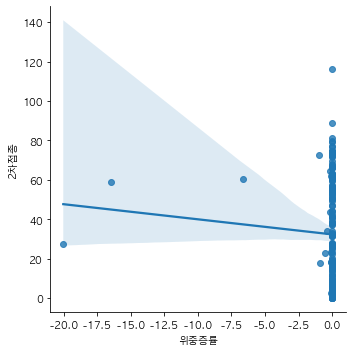

In [68]:
sns.lmplot(x = "위중증률", y = "2차접종", data = corona_part)

In [69]:
corona_part[["위중증률", "2차접종"]].corr()

,위중증률,2차접종
위중증률,1.000000,-0.058048
2차접종,-0.058048,1.000000


### 결과 확인 : 인구당 접종률과 위중증률은 거의 관계가 없다.
### 오류가 없을까?
    * 오류 : -99999 데이터가 있었기에 정확하지 않을 수 있다.

### NaN 값 제거 후 분석

In [70]:
corona_part = corona_part[corona_part["위중증"].notnull()]
corona_part["위중증"].isnull().sum()

0

          위중증률      2차접종
위중증률  1.000000  0.252715
2차접종  0.252715  1.000000


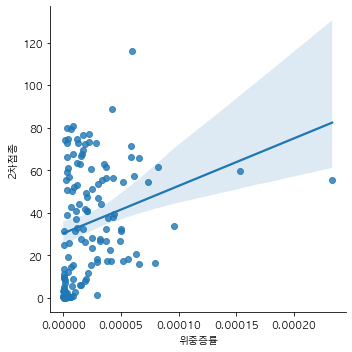

In [71]:
print(corona_part[["위중증률", "2차접종"]].corr())
sns.lmplot(x = "위중증률", y = "2차접종", data = corona_part)

## 200만명 이상의 나라를 가져와서, 데이터 상관관계 분석
    * 백신접종률과 인구당확진자비율
    * 백신접종률과 사망률
    * 백신접종률과 위중증률

<AxesSubplot:xlabel='인구수', ylabel='Count'>

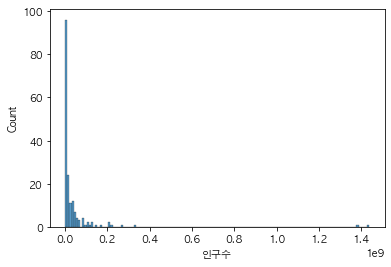

In [75]:
sns.histplot(corona["인구수"])

In [72]:
corona.columns

Index(['국가명', 'eng_code', '발생률', '인구수', '확진자_합계', '백신접종', '백신보유율(인구)',
       '발생률_순위', '접종률_순위', '1차접종', '2차접종', '위중증', '치명(%)', '완치(%)', '확진자1일',
       '사망자합계', '사망자1일', '완치합계', '완치1일', '접종비율(일간)', '인구당확진자비율', '사망률',
       '위중증_수', '위중증_증감', '위중증_수2', '위중증률'],
      dtype='object')

In [89]:
corona_200m = corona.loc[corona["인구수"] > 5000000, :]
corona_200m.shape

(114, 26)

<AxesSubplot:xlabel='인구수', ylabel='Count'>

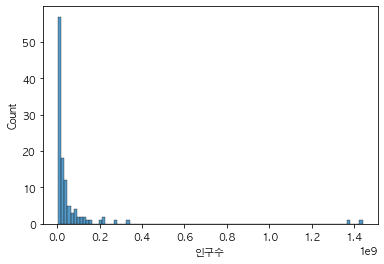

In [90]:
sns.histplot(corona_200m["인구수"])

In [91]:
corona_200m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114 entries, 0 to 163
Data columns (total 26 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   국가명        114 non-null    object 
 1   eng_code   114 non-null    object 
 2   발생률        114 non-null    int64  
 3   인구수        114 non-null    int64  
 4   확진자_합계     114 non-null    int64  
 5   백신접종       114 non-null    float64
 6   백신보유율(인구)  114 non-null    float64
 7   발생률_순위     114 non-null    float64
 8   접종률_순위     114 non-null    float64
 9   1차접종       114 non-null    float64
 10  2차접종       114 non-null    float64
 11  위중증        86 non-null     object 
 12  치명(%)      114 non-null    object 
 13  완치(%)      111 non-null    float64
 14  확진자1일      90 non-null     float64
 15  사망자합계      114 non-null    int64  
 16  사망자1일      76 non-null     float64
 17  완치합계       111 non-null    float64
 18  완치1일       78 non-null     float64
 19  접종비율(일간)   114 non-null    float64
 20  인구당확진자비율  

### 백신접종률과 인구당확진자비율의 상관관계 분석

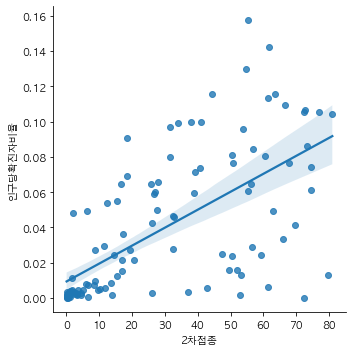

In [92]:
sns.lmplot(x = "2차접종", y = "인구당확진자비율", data = corona_200m)

In [93]:
corona_200m[["인구당확진자비율", "2차접종"]].corr()

,인구당확진자비율,2차접종
인구당확진자비율,1.000000,0.648986
2차접종,0.648986,1.000000


### 백신접종률과 사망률의 상관관계

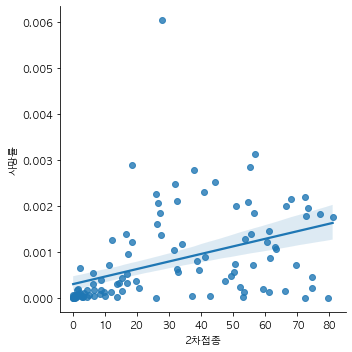

In [94]:
sns.lmplot(x = "2차접종", y = "사망률", data = corona_200m)

In [95]:
corona_200m[["2차접종", "사망률"]].corr()

,2차접종,사망률
2차접종,1.000000,0.432435
사망률,0.432435,1.000000


### 백신접종률과 위중증률(nan제외)의 상관관계

In [96]:
corona_200m.loc[corona["위중증률"].isnull(), :]

,국가명,eng_code,발생률,인구수,확진자_합계,백신접종,백신보유율(인구),발생률_순위,접종률_순위,1차접종,2차접종,위중증,치명(%),완치(%),확진자1일,사망자합계,사망자1일,완치합계,완치1일,접종비율(일간),인구당확진자비율,사망률,위중증_수,위중증_증감,위중증_수2,위중증률


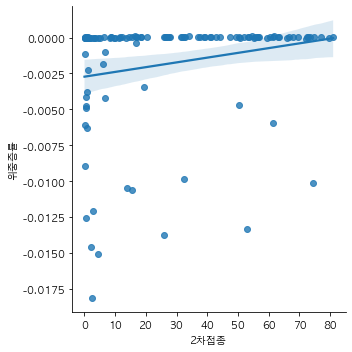

In [97]:
sns.lmplot(x = "2차접종", y = "위중증률", data = corona_200m)

In [98]:
corona_200m[["2차접종", "위중증률"]].corr()

,2차접종,위중증률
2차접종,1.000000,0.211466
위중증률,0.211466,1.000000


### 데이터 확인

In [99]:
corona_200m["위중증_수2"].unique()

array([ 24327,   8944,   8318,   1020,   2300,   1832,    633,   6707,
         1496,    542,   1028,    530, -99999,   1217,   4798,    113,
         3170,    177,   1043,   1191,    208,    618,     28,   1458,
          434,    638,   1403,   4387,    714,   4840,    218,    952,
           43,     86,    776,    181,    221,    260,     45,    509,
          503,    219,    380,    348,    200,    339,      5,    759,
          489,    220,    391,     37,     60,    515,    681,     22,
          784,     19,     90,    332,    109,     11,     21,     20,
          131,     23,   1124,     32,     12,     42,    381,    127,
          292,    152,      7,     67,      8,      3,     24,      2])

In [100]:
corona_200m["위중증_수"].unique()

array([ 24327,   8944,   8318,   1020,   2300,   1832,    633,   6707,
         1496,    542,   1028,    530, -99999,   1217,   4798,    113,
         3170,    177,   1043,   1191,    208,    618,     28,   1458,
          434,    638,   1403,   4387,    714,   4840,    218,    952,
           43,     86,    776,    181,    221,    260,     45,    509,
          503,    219,    380,    348,    200,    339,      5,    759,
          489,    220,    391,     37,     60,    515,    681,     22,
          784,     19,     90,    332,    109,     11,     21,     20,
          131,     23,   1124,     32,     12,     42,    381,    127,
          292,    152,      7,     67,      8,      3,     24,      2])

In [102]:
corona_200m = corona_200m.loc[corona_200m["위중증"].notnull(), :]
corona_200m.shape

(86, 26)

### 새로운 데이터 프레임 생성

In [108]:
corona_200m_part = corona_200m[["국가명", "인구수", "2차접종", "위중증"]]
corona_200m_part.head(3)

,국가명,인구수,2차접종,위중증
0,미국,331002651,54.6,24327\n-523
1,인도,1380004385,14.5,8944
2,브라질,212559417,37.8,8318


In [109]:
corona_200m_part[["위중증_수", "위중증_증감"]] = corona_200m_part["위중증"].str.split("\n", expand = True)
corona_200m_part.head(3)

/Users/seungwoomun/opt/anaconda3/envs/likelion/lib/python3.8/site-packages/pandas/core/frame.py:3636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,국가명,인구수,2차접종,위중증,위중증_수,위중증_증감
0,미국,331002651,54.6,24327\n-523,24327,-523
1,인도,1380004385,14.5,8944,8944,None
2,브라질,212559417,37.8,8318,8318,None


In [110]:
corona_200m_part["위중증_수"] = corona_200m_part["위중증_수"].astype("int16")
corona_200m_part.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86 entries, 0 to 159
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   국가명     86 non-null     object 
 1   인구수     86 non-null     int64  
 2   2차접종    86 non-null     float64
 3   위중증     86 non-null     object 
 4   위중증_수   86 non-null     int16  
 5   위중증_증감  39 non-null     object 
dtypes: float64(1), int16(1), int64(1), object(3)
memory usage: 4.2+ KB


/var/folders/t9/yt46lj5s0lv1slvgpm05mrs00000gn/T/ipykernel_34316/2363834576.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corona_200m_part["위중증_수"] = corona_200m_part["위중증_수"].astype("int16")


In [111]:
corona_200m_part["위중증률"] = corona_200m_part["위중증_수"] / corona_200m_part["인구수"]
corona_200m_part.head(3)

/var/folders/t9/yt46lj5s0lv1slvgpm05mrs00000gn/T/ipykernel_34316/509945336.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corona_200m_part["위중증률"] = corona_200m_part["위중증_수"] / corona_200m_part["인구수"]


,국가명,인구수,2차접종,위중증,위중증_수,위중증_증감,위중증률
0,미국,331002651,54.6,24327\n-523,24327,-523,0.000073
1,인도,1380004385,14.5,8944,8944,None,0.000006
2,브라질,212559417,37.8,8318,8318,None,0.000039


### 위중증률과 2차접종(백신접종률)의 상관관계

In [112]:
corona_200m_part[["위중증률", "2차접종"]].corr()

,위중증률,2차접종
위중증률,1.000000,0.192668
2차접종,0.192668,1.000000


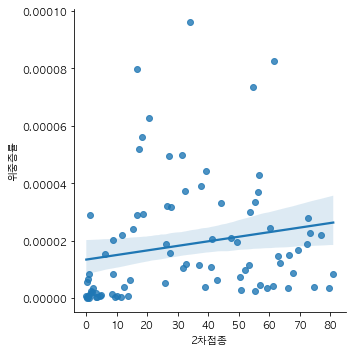

In [114]:
sns.lmplot(x = "2차접종", y = "위중증률", data = corona_200m_part)